## Metropolis Hasting for particule multiple

### Test 5 Theta/5 kappa variation de n et des sigmas

### Packages

In [1]:
%cd ../..

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank


In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

from bandits_to_rank.sampling.metropolis_hasting import *
from bandits_to_rank.sampling.proposal import *
from bandits_to_rank.sampling.target import *
from bandits_to_rank.data.Methode_Simulation_KappasThetasKnown import *

from random import uniform
from copy import deepcopy

%matplotlib inline
%precision 4

%reload_ext autoreload
%autoreload 2
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

In [3]:
thetas = [0.9, 0.7 ,0.2 ,0.2 ,0.1 ]
#thetas_bis = [round(gauss(0.4,0.05),2) for i in range(100)]
kappas = [1,0.9,0.7,0.5,0.2] ### attention c'est peut etre trop facile s'il y en a à 1 => ok parce que Simul
n = 1000

dict_100 = Simulation(100,thetas,kappas)
dict_500 = Simulation(500,thetas,kappas)
dict_1000 = Simulation(1000,thetas,kappas)
dict_5000 = Simulation(5000,thetas,kappas)
dict_10000 = Simulation(10000,thetas,kappas)

In [4]:
part0 = [np.array([uniform(0, 1) for i  in range(len(thetas))]), np.array([1]+[uniform(0, 1) for i  in range(1,len(kappas))])]
part0

[array([0.1012, 0.0176, 0.9557, 0.9236, 0.154 ]),
 array([1.    , 0.6864, 0.5216, 0.9147, 0.2163])]

### All_ at once MA

In [ ]:
c=3

In [24]:
def proposals_MA_s_var (n,c, part):
    s=(c/math.sqrt(n))
    return  [Proposal_MA(sigma=s,on_theta=True, k=i) for i in range(part[0].shape[0])] + [Proposal_MA(sigma=s,on_theta=False, k=i) for i in range(1,part[1].shape[0])]


In [13]:
proposals_MA_s_03 = [Proposal_MA(on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_MA(on_theta=False, k=i) for i in range(1,part0[1].shape[0])]
proposals_MA_s_01 = [Proposal_MA(sigma=0.1,on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_MA(sigma=0.1,on_theta=False, k=i) for i in range(1,part0[1].shape[0])]
proposals_MA_s_07 = [Proposal_MA(sigma=0.7,on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_MA(sigma=0.7,on_theta=False, k=i) for i in range(1,part0[1].shape[0])]
#proposals_MA_s_varisigma = proposals_MA_s_var(n,c,part0)

targets_100 = [Target(dict_100, i) for i in range(part0[0].shape[0])] + [Target(dict_100, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]
targets_500 = [Target(dict_500, i) for i in range(part0[0].shape[0])] + [Target(dict_500, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]
targets_1000 = [Target(dict_1000, i) for i in range(part0[0].shape[0])] + [Target(dict_1000, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]
targets_5000 = [Target(dict_5000, i) for i in range(part0[0].shape[0])] + [Target(dict_5000, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]
targets_10000 = [Target(dict_10000, i) for i in range(part0[0].shape[0])] + [Target(dict_10000, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]


In [16]:
%time samples_MA_03_100,Eff_MA_03_100 = log_Metro_hast (proposals_MA_s_03, targets_100, part0, 1000, True )
%time samples_MA_03_500,Eff_MA_03_500 = log_Metro_hast (proposals_MA_s_03, targets_500, part0, 1000, True )
%time samples_MA_03_1000,Eff_MA_03_1000 = log_Metro_hast (proposals_MA_s_03, targets_1000, part0, 1000, True )
%time samples_MA_03_5000,Eff_MA_03_5000 = log_Metro_hast (proposals_MA_s_03, targets_5000, part0, 1000, True )
%time samples_MA_03_10000,Eff_MA_03_10000 = log_Metro_hast (proposals_MA_s_03, targets_10000, part0, 1000, True )

Wall time: 1min 41s
Wall time: 1min 46s
Wall time: 1min 43s
Wall time: 1min 53s
Wall time: 1min 48s


In [17]:
%time samples_MA_01_100, Eff_MA_01_100 = log_Metro_hast (proposals_MA_s_01, targets_100, part0, 1000, True )
%time samples_MA_01_500, Eff_MA_01_500 = log_Metro_hast (proposals_MA_s_01, targets_500, part0, 1000, True )
%time samples_MA_01_1000, Eff_MA_01_1000 = log_Metro_hast (proposals_MA_s_01, targets_1000, part0, 1000, True )
%time samples_MA_01_5000, Eff_MA_01_5000 = log_Metro_hast (proposals_MA_s_01, targets_5000, part0, 1000, True )
%time samples_MA_01_10000, Eff_MA_01_10000 = log_Metro_hast (proposals_MA_s_01, targets_10000, part0, 1000, True )

Wall time: 2min 7s
Wall time: 2min 14s
Wall time: 2min 36s
Wall time: 2min 23s
Wall time: 2min 26s


In [18]:
%time samples_MA_07_100, Eff_MA_07_100 = log_Metro_hast (proposals_MA_s_07, targets_100, part0, 1000, True )
%time samples_MA_07_500, Eff_MA_07_500 = log_Metro_hast (proposals_MA_s_07, targets_500, part0, 1000, True )
%time samples_MA_07_1000, Eff_MA_07_1000 = log_Metro_hast (proposals_MA_s_07, targets_1000, part0, 1000, True )
%time samples_MA_07_5000, Eff_MA_07_5000 = log_Metro_hast (proposals_MA_s_07, targets_5000, part0, 1000, True )
%time samples_MA_07_10000, Eff_MA_07_10000 = log_Metro_hast (proposals_MA_s_07, targets_10000, part0, 1000, True )

Wall time: 1min 31s
Wall time: 1min 25s
Wall time: 1min 15s
Wall time: 1min 16s
Wall time: 1min 10s


In [26]:
%time samples_MA_VS_100, Eff_MA_VS_100 = log_Metro_hast (proposals_MA_s_var(100,c,part0), targets_100, part0, 1000, True )
%time samples_MA_VS_500, Eff_MA_VS_500 = log_Metro_hast (proposals_MA_s_var(500,c,part0), targets_500, part0, 1000, True )
%time samples_MA_VS_1000, Eff_MA_VS_1000 = log_Metro_hast (proposals_MA_s_var(1000,c,part0), targets_1000, part0, 1000, True )
%time samples_MA_VS_5000, Eff_MA_VS_5000 = log_Metro_hast (proposals_MA_s_var(5000,c,part0), targets_5000, part0, 1000, True )
%time samples_MA_VS_10000, Eff_MA_VS_10000 = log_Metro_hast (proposals_MA_s_var(10000,c,part0), targets_10000, part0, 1000, True )

Wall time: 1min 37s
Wall time: 2min 34s
Wall time: 2h 11min 45s
Wall time: 3min
Wall time: 3min 9s


In [19]:
thetas_MH_MA_03_100 , kappas_MH_MA_03_100 = split_sample(samples_MA_03_100)
thetas_MH_MA_03_500 , kappas_MH_MA_03_500 = split_sample(samples_MA_03_500)
thetas_MH_MA_03_1000 , kappas_MH_MA_03_1000 = split_sample(samples_MA_03_1000)
thetas_MH_MA_03_5000 , kappas_MH_MA_03_5000 = split_sample(samples_MA_03_5000)
thetas_MH_MA_03_10000 , kappas_MH_MA_03_10000 = split_sample(samples_MA_03_10000)


In [27]:

thetas_MH_MA_01_100 , kappas_MH_MA_01_100 = split_sample(samples_MA_01_100)
thetas_MH_MA_01_500 , kappas_MH_MA_01_500 = split_sample(samples_MA_01_500)
thetas_MH_MA_01_1000 , kappas_MH_MA_01_1000 = split_sample(samples_MA_01_1000)
thetas_MH_MA_01_5000 , kappas_MH_MA_01_5000 = split_sample(samples_MA_01_5000)
thetas_MH_MA_01_10000 , kappas_MH_MA_01_10000 = split_sample(samples_MA_01_10000)


thetas_MH_MA_07_100 , kappas_MH_MA_07_100 = split_sample(samples_MA_07_100)
thetas_MH_MA_07_500 , kappas_MH_MA_07_500 = split_sample(samples_MA_07_500)
thetas_MH_MA_07_1000 , kappas_MH_MA_07_1000 = split_sample(samples_MA_07_1000)
thetas_MH_MA_07_5000 , kappas_MH_MA_07_5000 = split_sample(samples_MA_07_5000)
thetas_MH_MA_07_10000 , kappas_MH_MA_07_10000 = split_sample(samples_MA_07_10000)

thetas_MH_MA_VS_100 , kappas_MH_MA_VS_100 = split_sample(samples_MA_VS_100)
thetas_MH_MA_VS_500 , kappas_MH_MA_VS_500 = split_sample(samples_MA_VS_500)
thetas_MH_MA_VS_1000 , kappas_MH_MA_VS_1000 = split_sample(samples_MA_VS_1000)
thetas_MH_MA_VS_5000 , kappas_MH_MA_VS_5000 = split_sample(samples_MA_VS_5000)
thetas_MH_MA_VS_10000 , kappas_MH_MA_VS_10000 = split_sample(samples_MA_VS_10000)



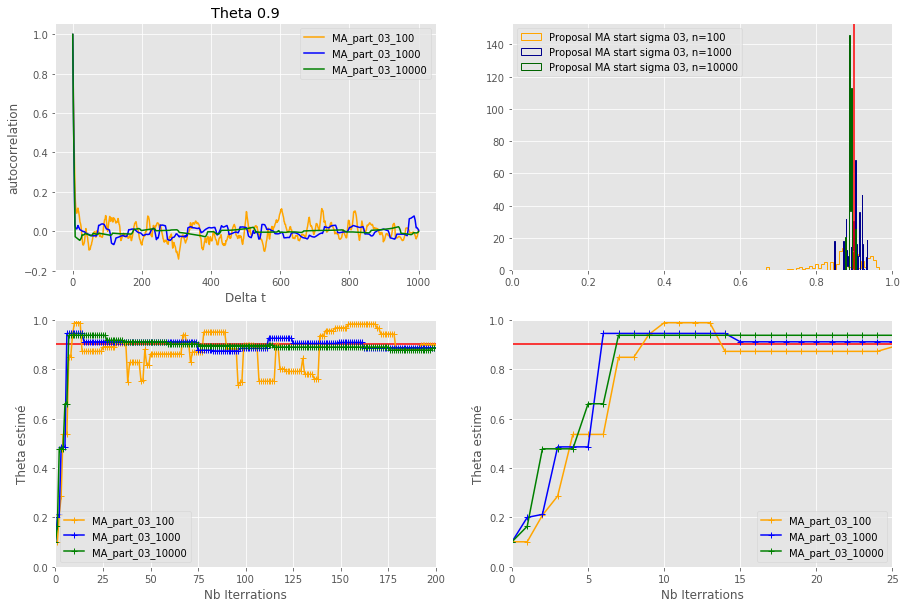

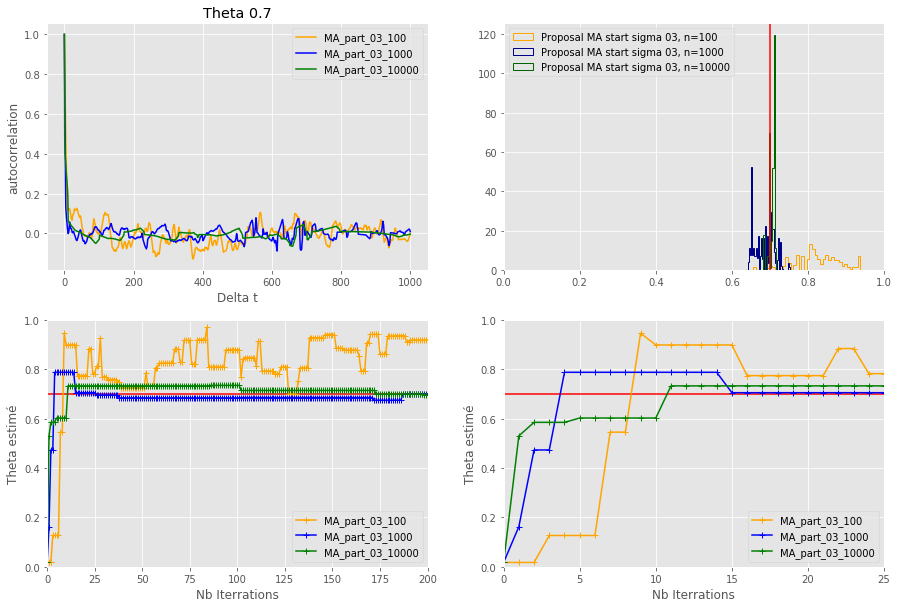

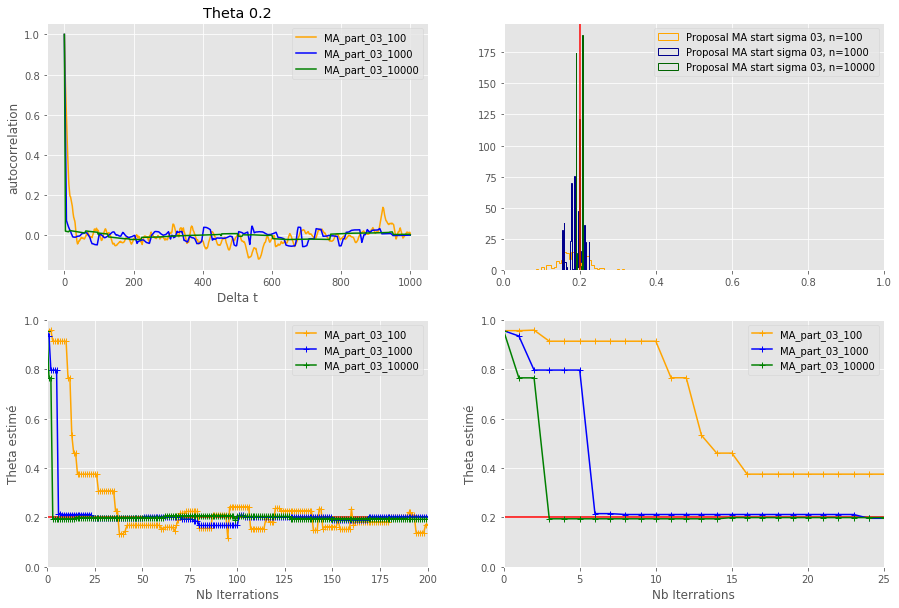

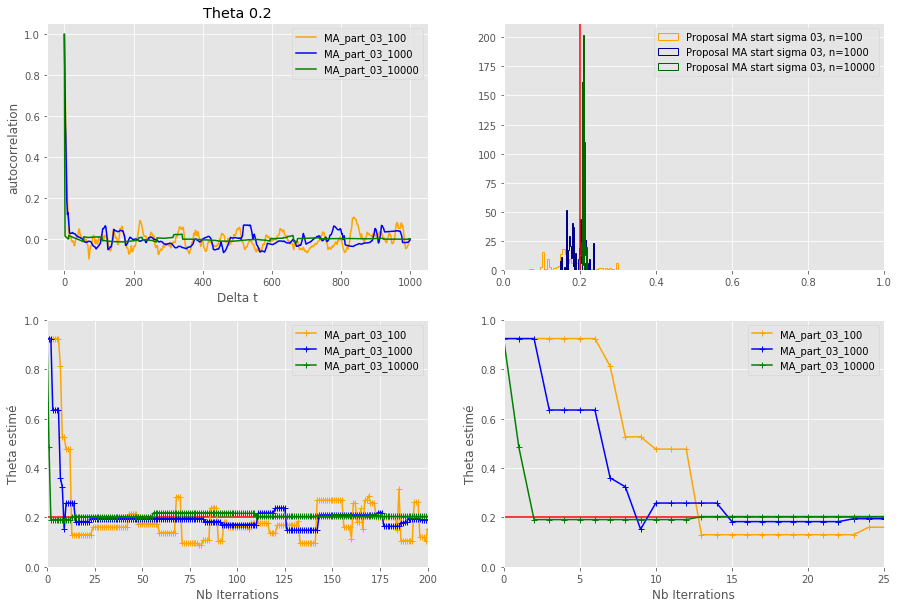

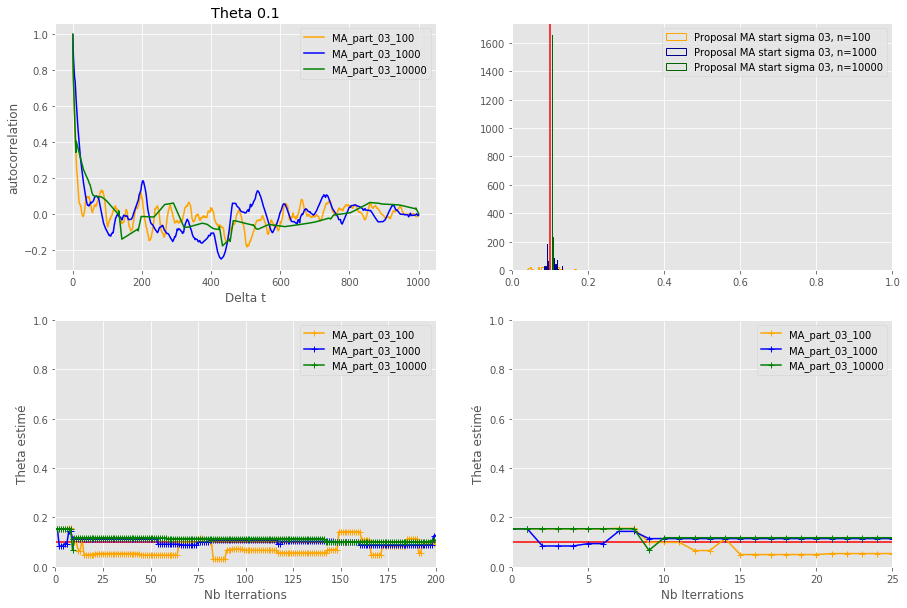

In [28]:
nmcmc = len(thetas_MH_MA_03_100[0])//2

for i in range(part0[0].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Theta '+str(thetas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+str(thetas[i]))
    
    notrend_samples_MA_theta_03_100 = detrend(np.array(thetas_MH_MA_03_100[i]))
    cor = acf(notrend_samples_MA_theta_03_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_03_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_03_1000 = detrend(np.array(thetas_MH_MA_03_1000[i]))
    cor = acf(notrend_samples_MA_theta_03_1000, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_03_1000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_03_10000 = detrend(np.array(thetas_MH_MA_03_10000[i]))
    cor = acf(notrend_samples_MA_theta_03_10000, nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_03_10000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=thetas[i], color='r')

    plt.hist(thetas_MH_MA_03_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal MA start sigma 03, n=100');
    plt.hist(thetas_MH_MA_03_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal MA start sigma 03, n=1000');
    plt.hist(thetas_MH_MA_03_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal MA start sigma 03, n=10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_03_100[i]), '-+',c='orange', label='MA_part_03_100')
    plt.plot(np.array(thetas_MH_MA_03_1000[i]), '-+',c='blue', label='MA_part_03_1000')
    plt.plot(np.array(thetas_MH_MA_03_10000[i]), '-+',c='green', label='MA_part_03_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_03_100[i]), '-+',c='orange', label='MA_part_03_100')
    plt.plot(np.array(thetas_MH_MA_03_1000[i]), '-+',c='blue', label='MA_part_03_1000')
    plt.plot(np.array(thetas_MH_MA_03_10000[i]), '-+',c='green', label='MA_part_03_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")

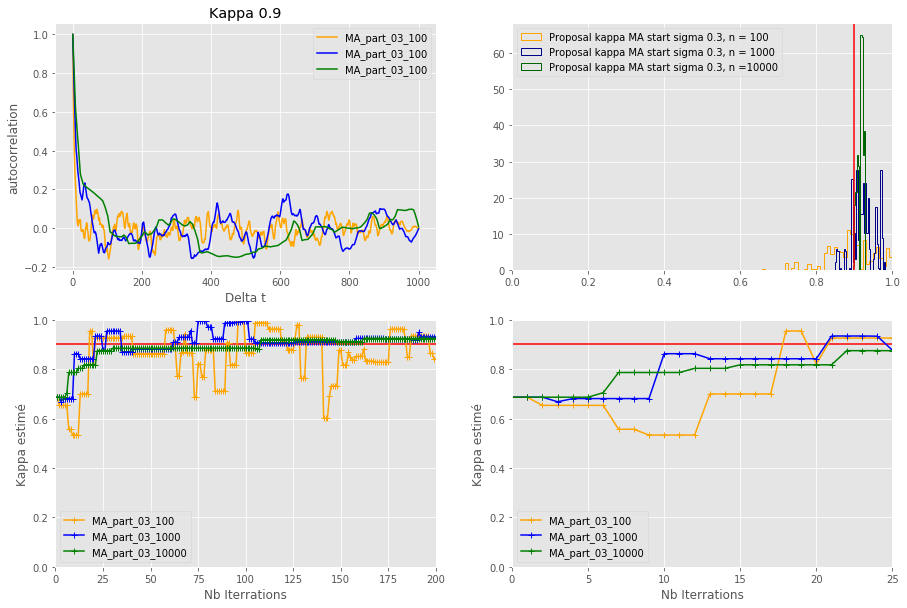

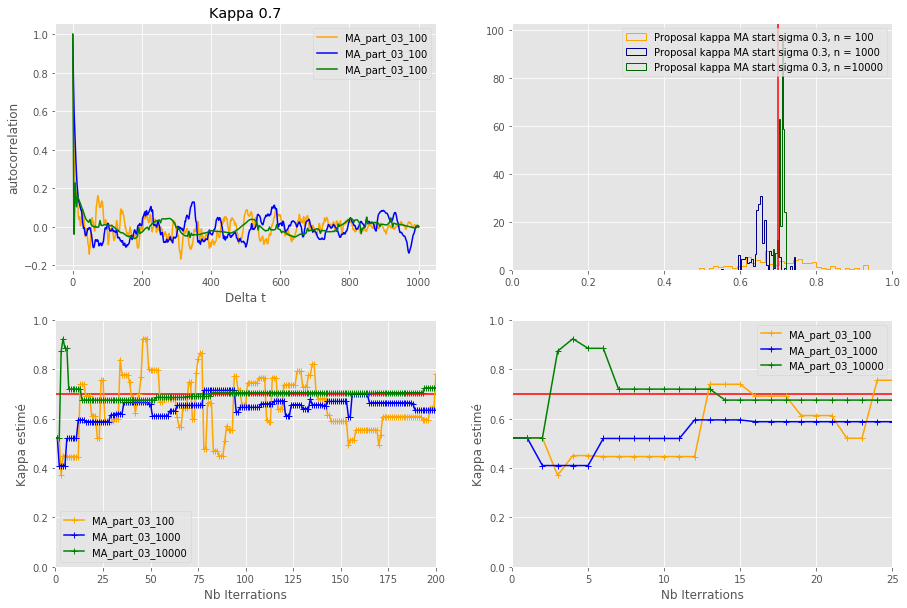

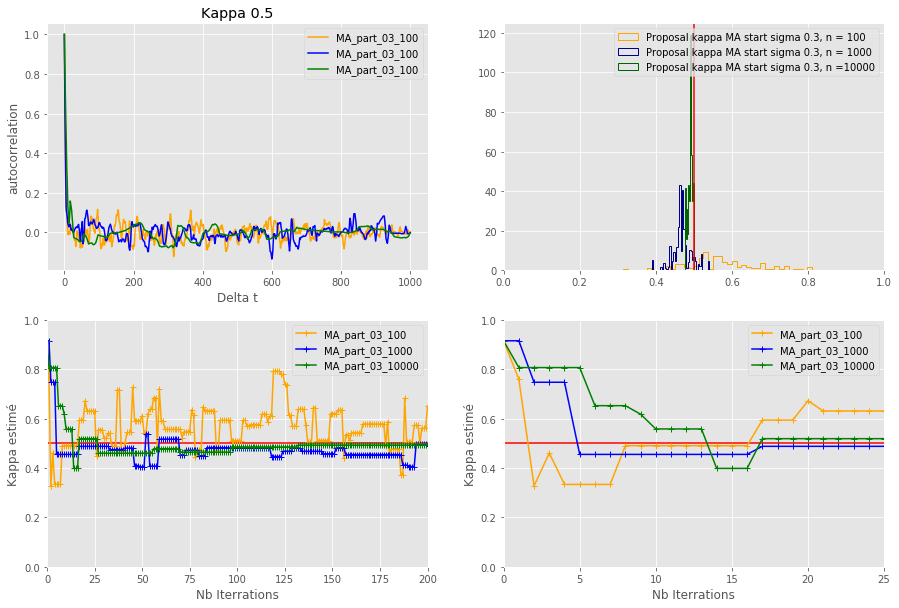

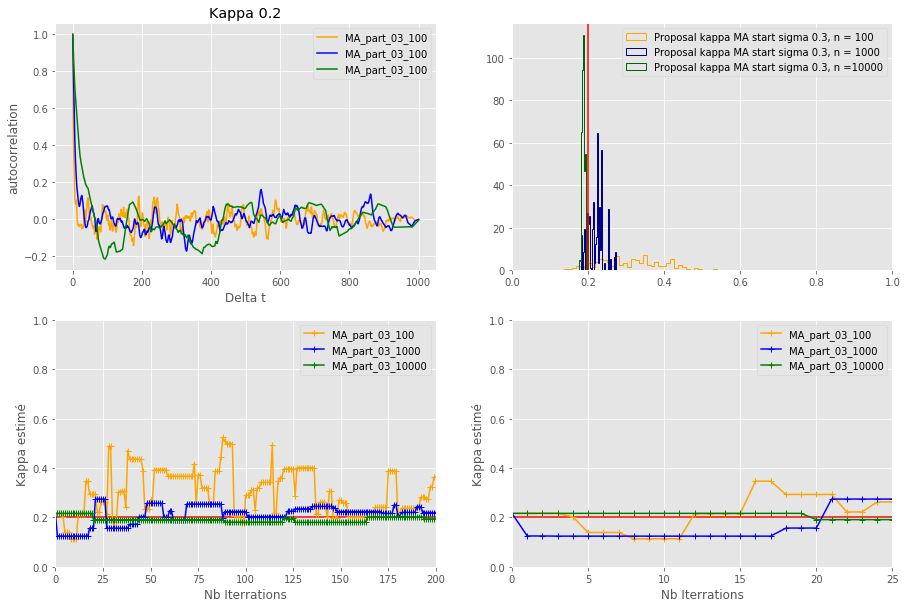

In [29]:
nmcmc = len(kappas_MH_MA_03_100[0])//2

for i in range(1,part0[1].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Kappa '+str(kappas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Kappa '+str(kappas[i]))
    notrend_samples_MA_kappas_03_100 = detrend(np.array(kappas_MH_MA_03_100[i]))
    cor = acf(notrend_samples_MA_kappas_03_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_03_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_03_100 = detrend(np.array(kappas_MH_MA_03_1000[i]))
    cor = acf(notrend_samples_MA_kappas_03_100, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_03_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_03_100 = detrend(np.array(kappas_MH_MA_03_10000[i]))
    cor = acf(notrend_samples_MA_kappas_03_100,nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_03_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=kappas[i], color='r')

    plt.hist(kappas_MH_MA_03_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.3, n = 100');
    plt.hist(kappas_MH_MA_03_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.3, n = 1000');
    plt.hist(kappas_MH_MA_03_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.3, n =10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_03_100[i]), '-+',c='orange', label='MA_part_03_100')
    plt.plot(np.array(kappas_MH_MA_03_1000[i]), '-+',c='blue', label='MA_part_03_1000')
    plt.plot(np.array(kappas_MH_MA_03_10000[i]), '-+',c='green', label='MA_part_03_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_03_100[i]), '-+',c='orange', label='MA_part_03_100')
    plt.plot(np.array(kappas_MH_MA_03_1000[i]), '-+',c='blue', label='MA_part_03_1000')
    plt.plot(np.array(kappas_MH_MA_03_10000[i]), '-+',c='green', label='MA_part_03_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")

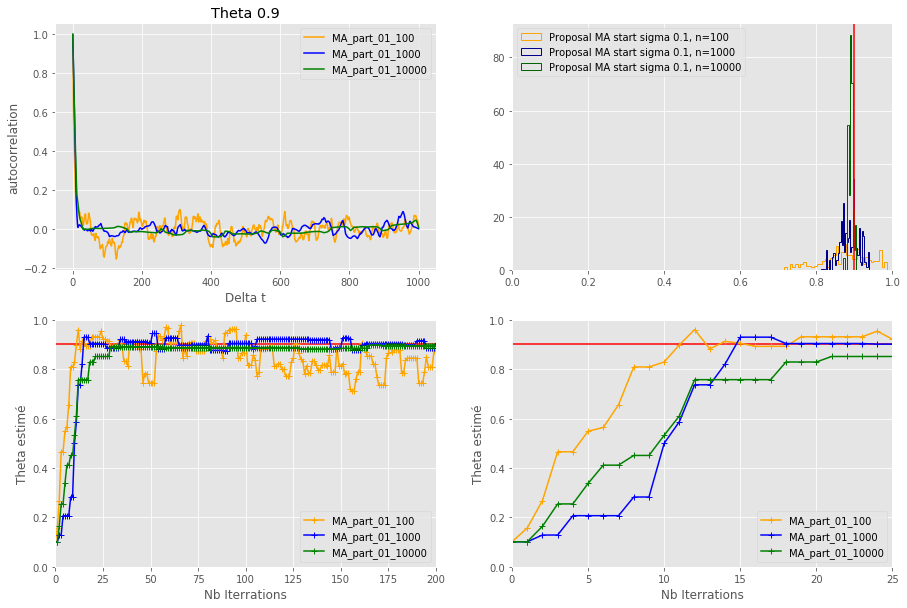

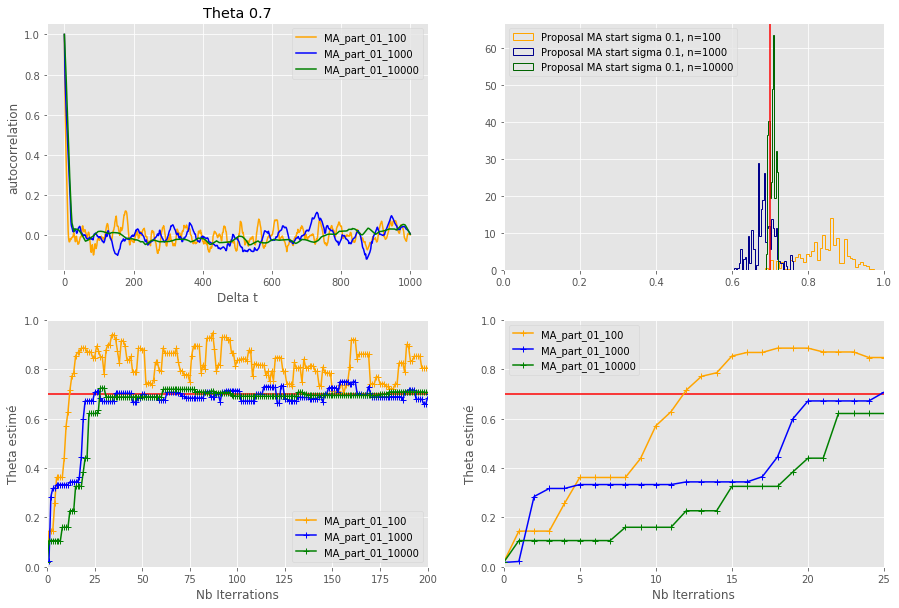

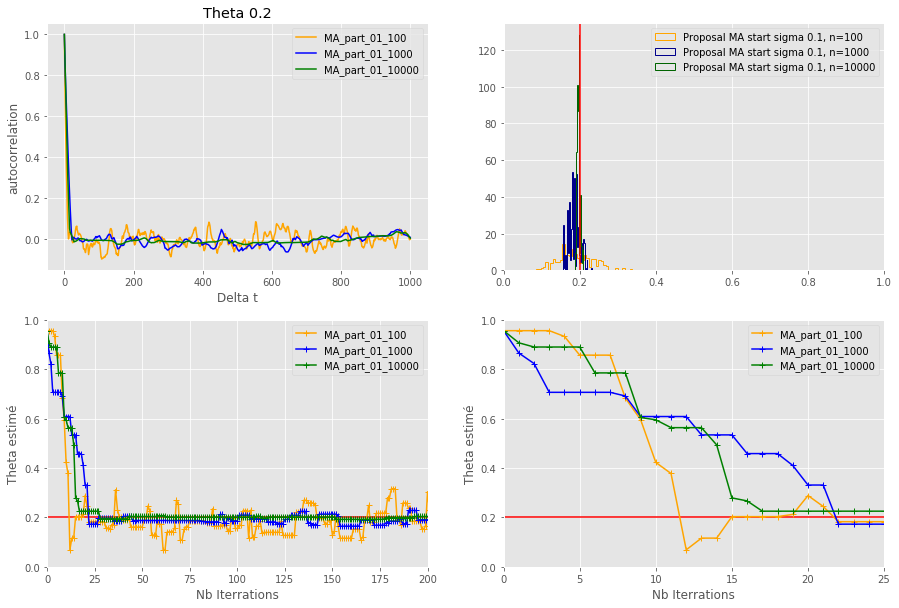

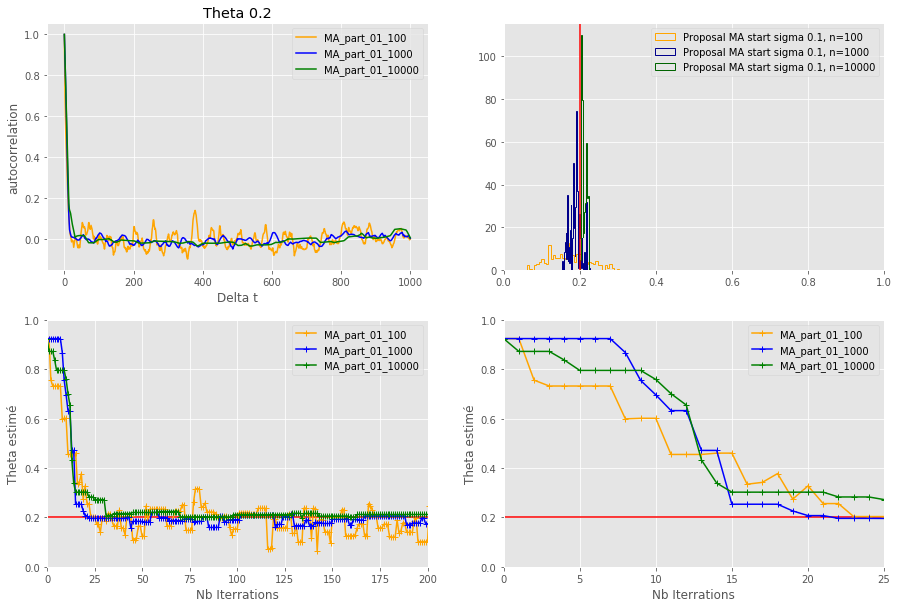

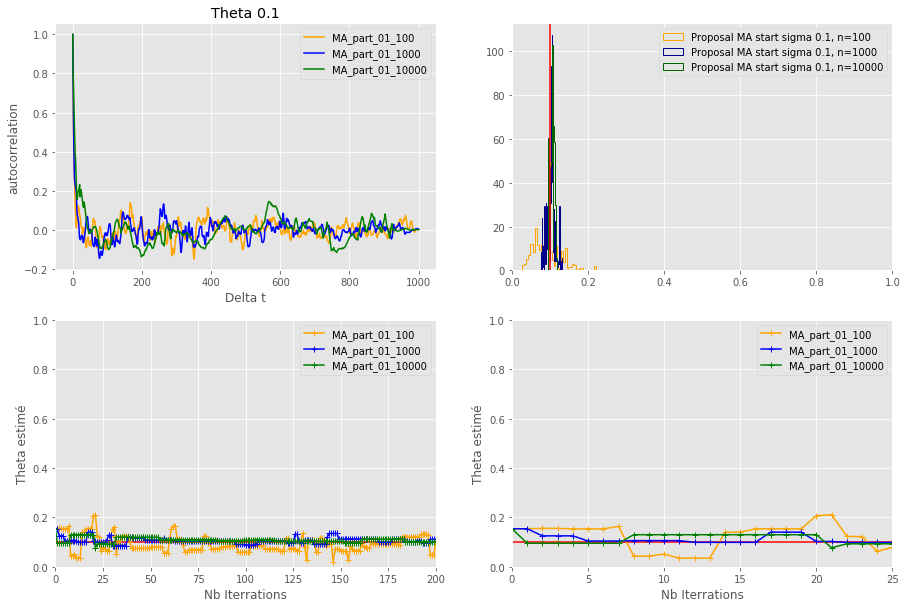

In [30]:
nmcmc = len(thetas_MH_MA_01_100[0])//2

for i in range(part0[0].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Theta '+str(thetas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+str(thetas[i]))
    notrend_samples_MA_theta_01_100 = detrend(np.array(thetas_MH_MA_01_100[i]))
    cor = acf(notrend_samples_MA_theta_01_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_01_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_01_1000 = detrend(np.array(thetas_MH_MA_01_1000[i]))
    cor = acf(notrend_samples_MA_theta_01_1000, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_01_1000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_01_10000 = detrend(np.array(thetas_MH_MA_01_10000[i]))
    cor = acf(notrend_samples_MA_theta_01_10000, nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_01_10000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=thetas[i], color='r')

    plt.hist(thetas_MH_MA_01_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal MA start sigma 0.1, n=100');
    plt.hist(thetas_MH_MA_01_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal MA start sigma 0.1, n=1000');
    plt.hist(thetas_MH_MA_01_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal MA start sigma 0.1, n=10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_01_100[i]), '-+',c='orange', label='MA_part_01_100')
    plt.plot(np.array(thetas_MH_MA_01_1000[i]), '-+',c='blue', label='MA_part_01_1000')
    plt.plot(np.array(thetas_MH_MA_01_10000[i]), '-+',c='green', label='MA_part_01_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_01_100[i]), '-+',c='orange', label='MA_part_01_100')
    plt.plot(np.array(thetas_MH_MA_01_1000[i]), '-+',c='blue', label='MA_part_01_1000')
    plt.plot(np.array(thetas_MH_MA_01_10000[i]), '-+',c='green', label='MA_part_01_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")

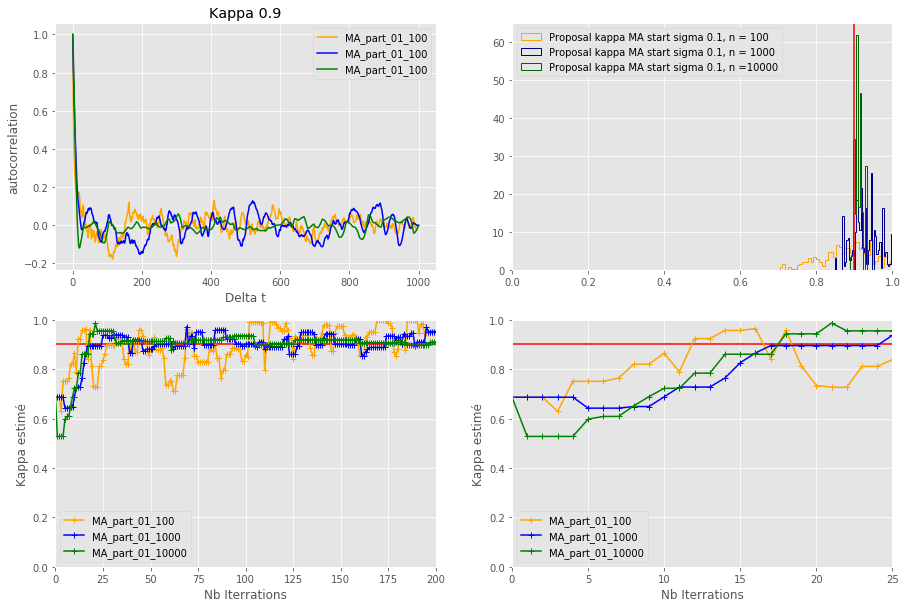

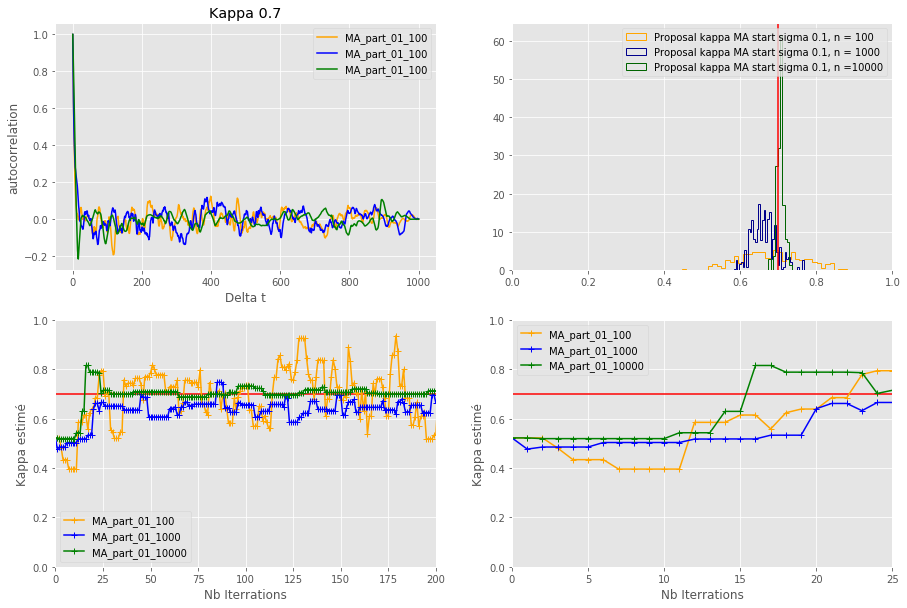

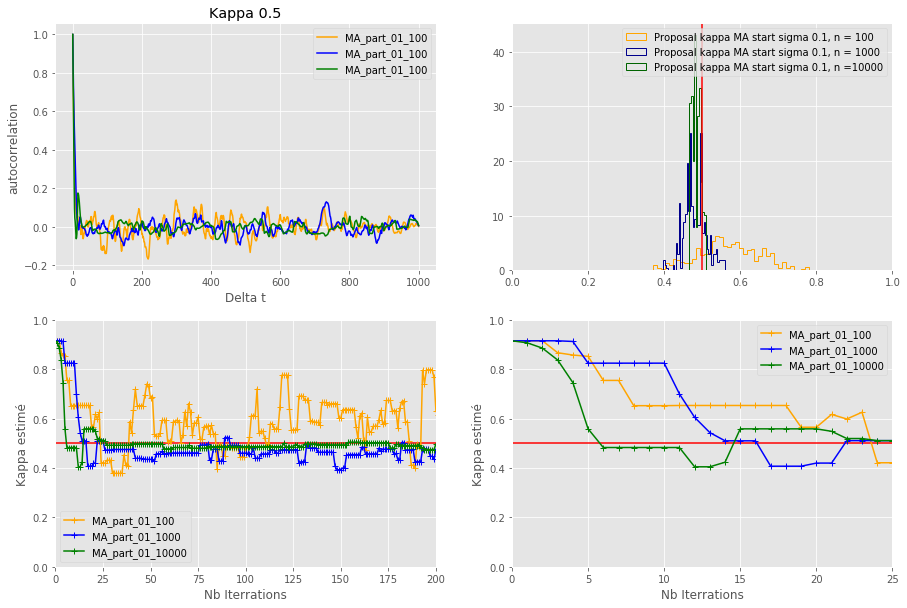

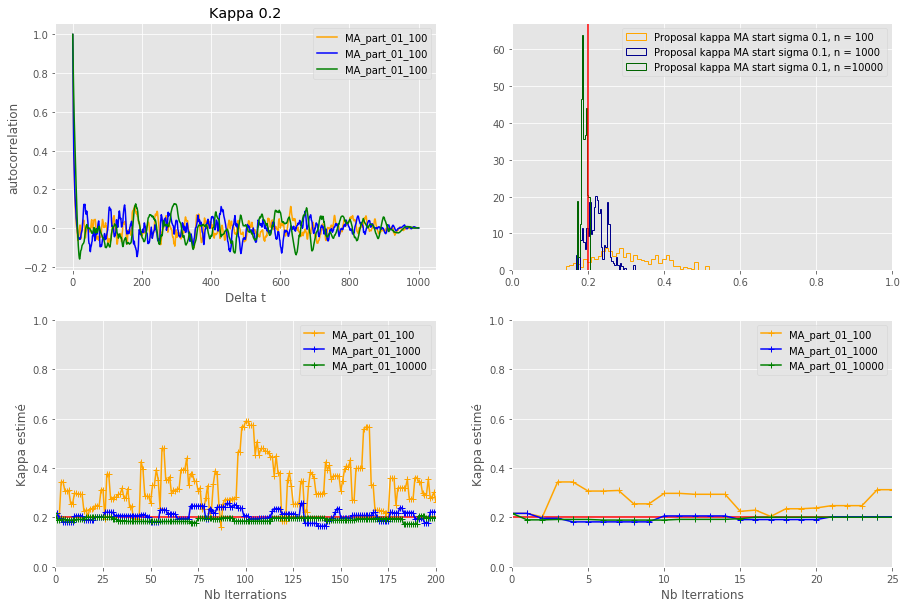

In [31]:
nmcmc = len(kappas_MH_MA_01_100[0])//2

for i in range(1,part0[1].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Kappa '+str(kappas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Kappa '+str(kappas[i]))
    notrend_samples_MA_kappas_01_100 = detrend(np.array(kappas_MH_MA_01_100[i]))
    cor = acf(notrend_samples_MA_kappas_01_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_01_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_01_100 = detrend(np.array(kappas_MH_MA_01_1000[i]))
    cor = acf(notrend_samples_MA_kappas_01_100, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_01_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_01_100 = detrend(np.array(kappas_MH_MA_01_10000[i]))
    cor = acf(notrend_samples_MA_kappas_01_100,nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_01_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=kappas[i], color='r')

    plt.hist(kappas_MH_MA_01_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.1, n = 100');
    plt.hist(kappas_MH_MA_01_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.1, n = 1000');
    plt.hist(kappas_MH_MA_01_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.1, n =10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_01_100[i]), '-+',c='orange', label='MA_part_01_100')
    plt.plot(np.array(kappas_MH_MA_01_1000[i]), '-+',c='blue', label='MA_part_01_1000')
    plt.plot(np.array(kappas_MH_MA_01_10000[i]), '-+',c='green', label='MA_part_01_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_01_100[i]), '-+',c='orange', label='MA_part_01_100')
    plt.plot(np.array(kappas_MH_MA_01_1000[i]), '-+',c='blue', label='MA_part_01_1000')
    plt.plot(np.array(kappas_MH_MA_01_10000[i]), '-+',c='green', label='MA_part_01_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")

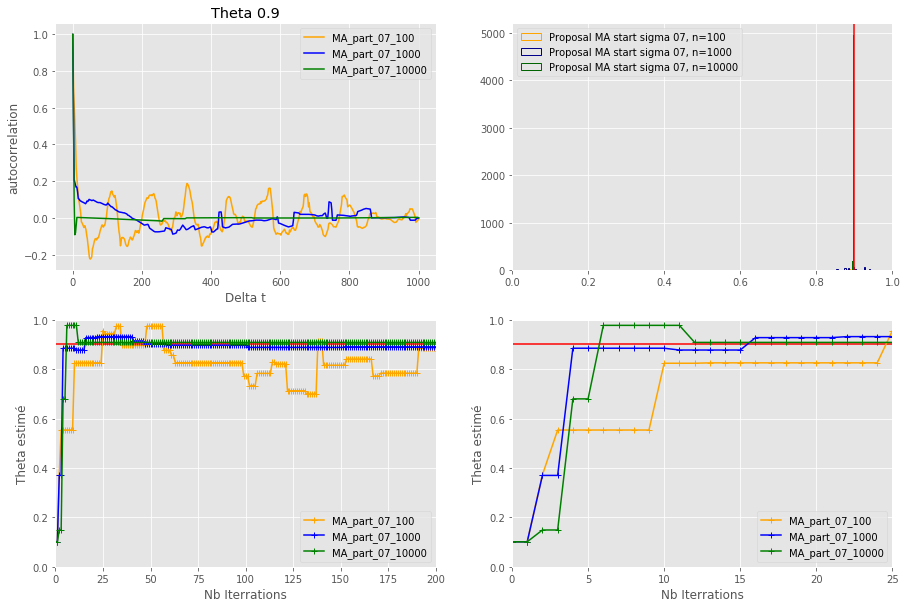

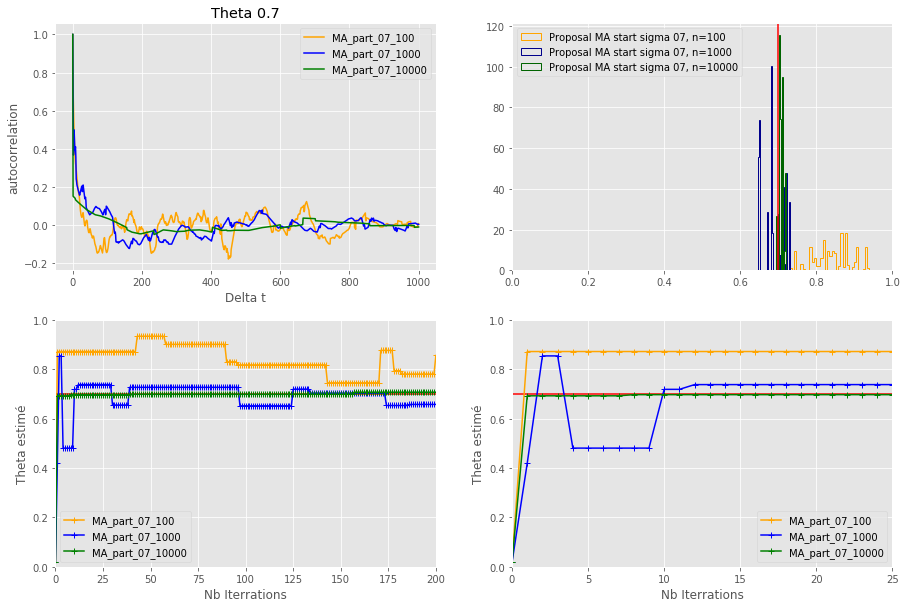

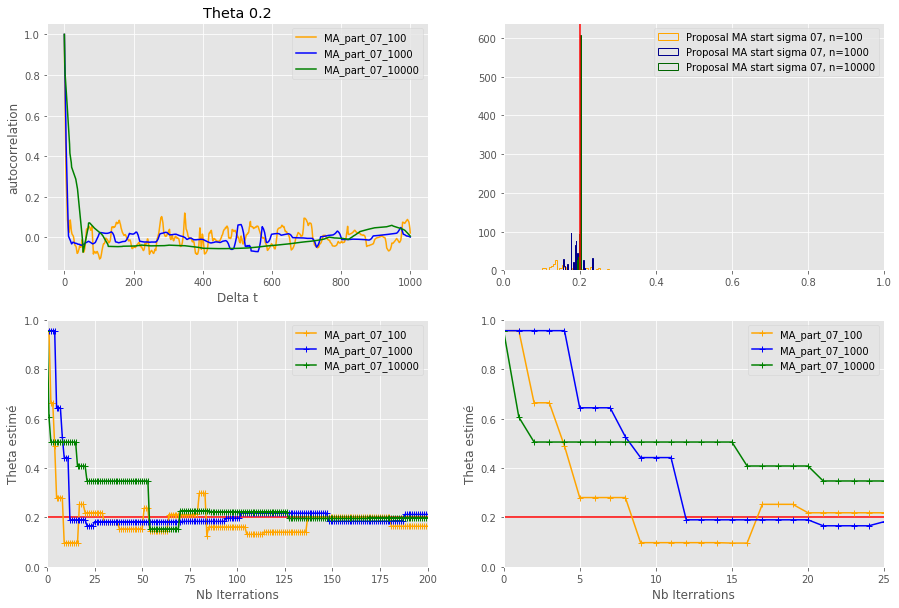

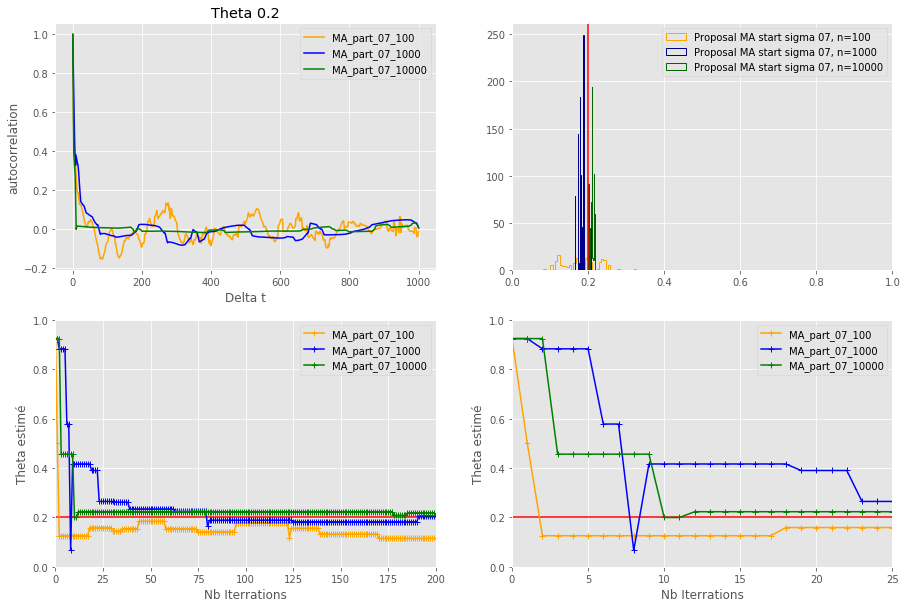

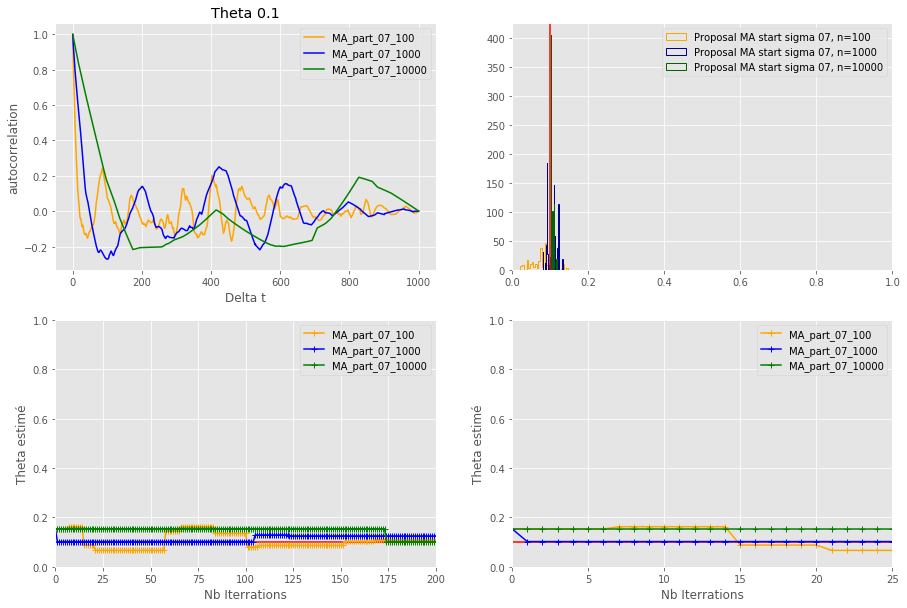

In [32]:
nmcmc = len(thetas_MH_MA_07_100[0])//2

for i in range(part0[0].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Theta '+str(thetas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+str(thetas[i]))
    notrend_samples_MA_theta_07_100 = detrend(np.array(thetas_MH_MA_07_100[i]))
    cor = acf(notrend_samples_MA_theta_07_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_07_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_07_1000 = detrend(np.array(thetas_MH_MA_07_1000[i]))
    cor = acf(notrend_samples_MA_theta_07_1000, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_07_1000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_07_10000 = detrend(np.array(thetas_MH_MA_07_10000[i]))
    cor = acf(notrend_samples_MA_theta_07_10000, nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_07_10000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=thetas[i], color='r')

    plt.hist(thetas_MH_MA_07_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal MA start sigma 07, n=100');
    plt.hist(thetas_MH_MA_07_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal MA start sigma 07, n=1000');
    plt.hist(thetas_MH_MA_07_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal MA start sigma 07, n=10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_07_100[i]), '-+',c='orange', label='MA_part_07_100')
    plt.plot(np.array(thetas_MH_MA_07_1000[i]), '-+',c='blue', label='MA_part_07_1000')
    plt.plot(np.array(thetas_MH_MA_07_10000[i]), '-+',c='green', label='MA_part_07_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_07_100[i]), '-+',c='orange', label='MA_part_07_100')
    plt.plot(np.array(thetas_MH_MA_07_1000[i]), '-+',c='blue', label='MA_part_07_1000')
    plt.plot(np.array(thetas_MH_MA_07_10000[i]), '-+',c='green', label='MA_part_07_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")

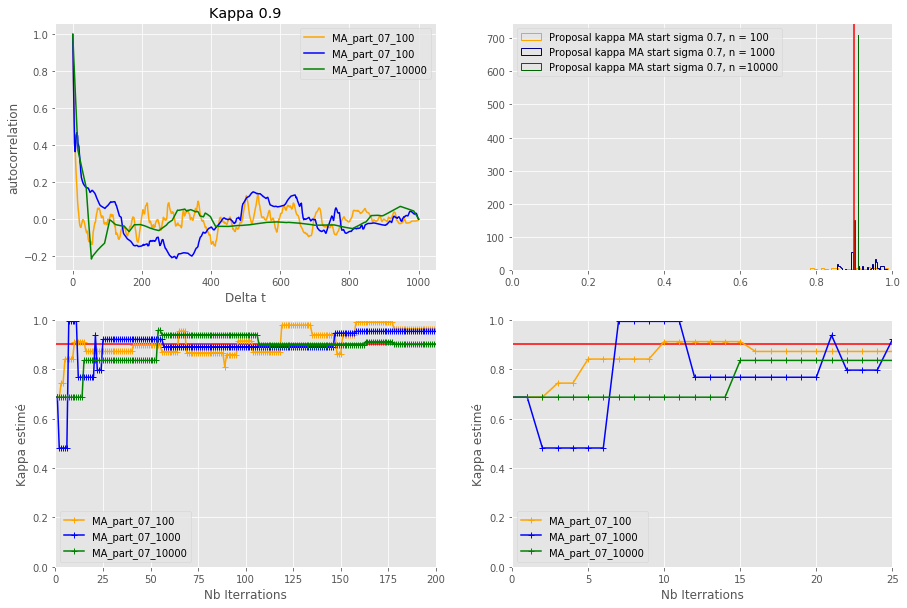

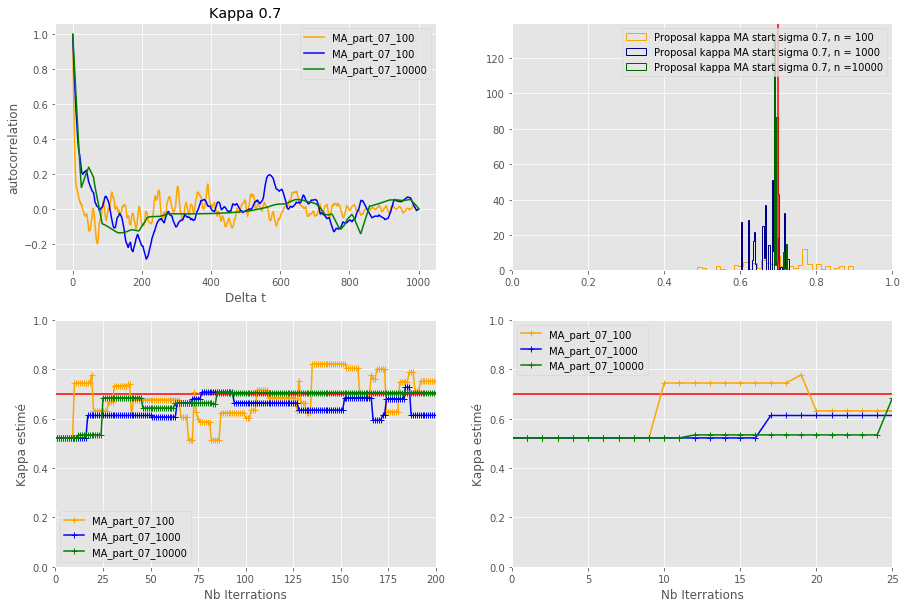

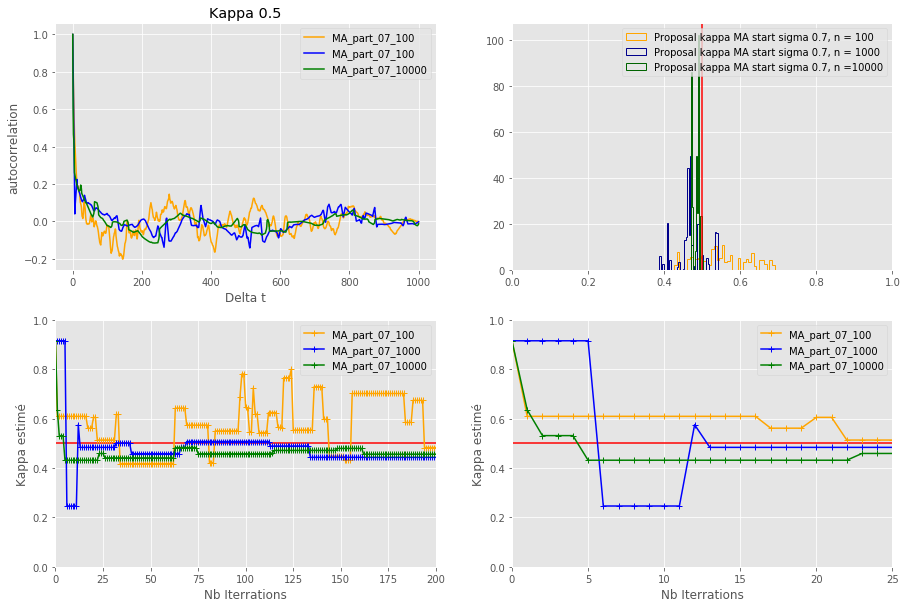

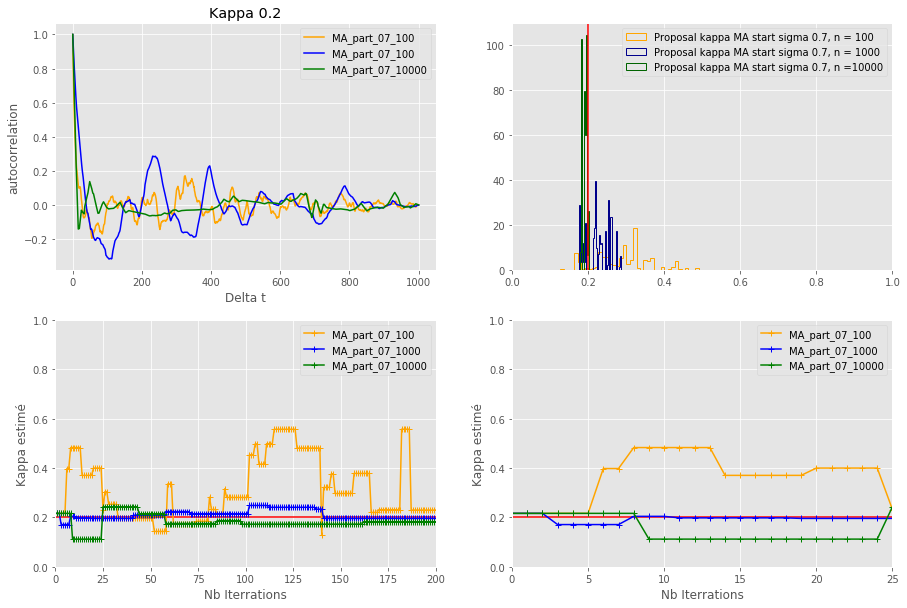

In [34]:
nmcmc = len(kappas_MH_MA_07_100[0])//2

for i in range(1,part0[1].shape[0]):
    plt.figure(figsize=(15, 10))
    plt.title('Kappa '+str(kappas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Kappa '+str(kappas[i]))
    notrend_samples_MA_kappas_07_100 = detrend(np.array(kappas_MH_MA_07_100[i]))
    cor = acf(notrend_samples_MA_kappas_07_100,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part_07_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_07_1000 = detrend(np.array(kappas_MH_MA_07_1000[i]))
    cor = acf(notrend_samples_MA_kappas_07_1000, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part_07_100')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_07_10000 = detrend(np.array(kappas_MH_MA_07_10000[i]))
    cor = acf(notrend_samples_MA_kappas_07_10000,nlags=2000)
    plt.plot(cor, c='green',label ='MA_part_07_10000')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=kappas[i], color='r')

    plt.hist(kappas_MH_MA_07_100[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.7, n = 100');
    plt.hist(kappas_MH_MA_07_1000[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.7, n = 1000');
    plt.hist(kappas_MH_MA_07_10000[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal kappa MA start sigma 0.7, n =10000');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_07_100[i]), '-+',c='orange', label='MA_part_07_100')
    plt.plot(np.array(kappas_MH_MA_07_1000[i]), '-+',c='blue', label='MA_part_07_1000')
    plt.plot(np.array(kappas_MH_MA_07_10000[i]), '-+',c='green', label='MA_part_07_10000')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_07_100[i]), '-+',c='orange', label='MA_part_07_100')
    plt.plot(np.array(kappas_MH_MA_07_1000[i]), '-+',c='blue', label='MA_part_07_1000')
    plt.plot(np.array(kappas_MH_MA_07_10000[i]), '-+',c='green', label='MA_part_07_10000')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")

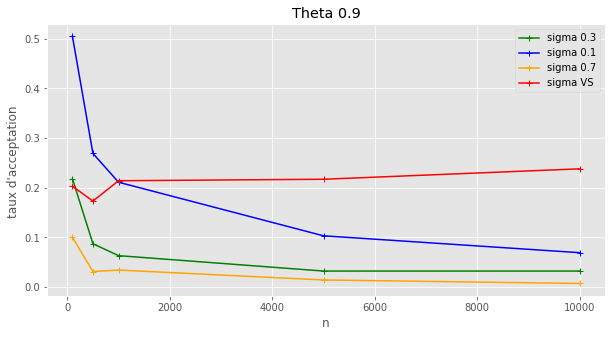

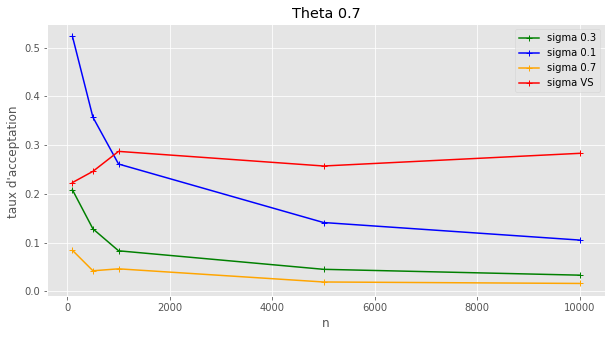

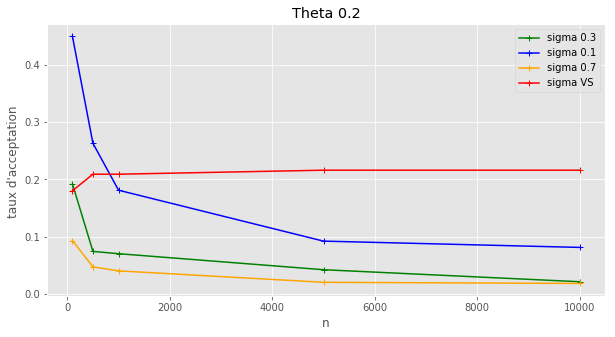

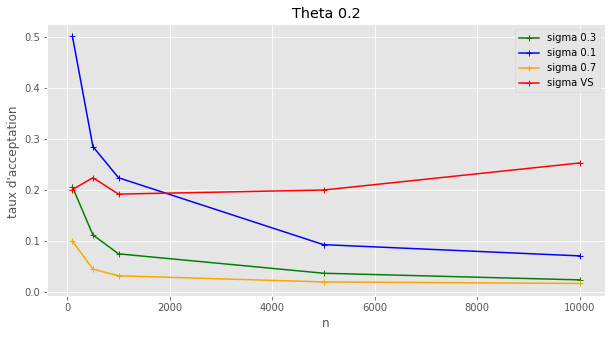

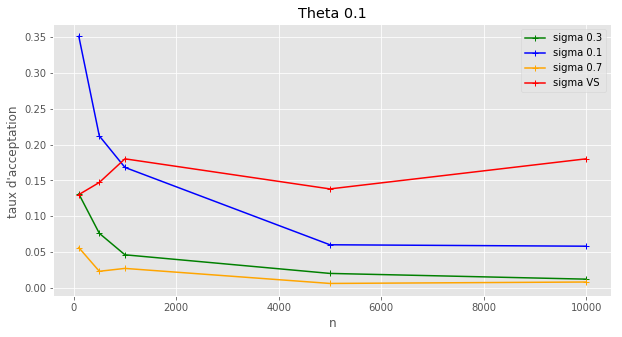

In [36]:
for i in range(part0[0].shape[0]):
    plt.figure(figsize=(10, 5))
    plt.title('Theta '+str(thetas[i]))
    x=[100,500,1000,5000,10000]
    y_03=[Eff_MA_03_100[i],Eff_MA_03_500[i],Eff_MA_03_1000[i],Eff_MA_03_5000[i],Eff_MA_03_10000[i]]
    y_01=[Eff_MA_01_100[i],Eff_MA_01_500[i],Eff_MA_01_1000[i],Eff_MA_01_5000[i],Eff_MA_01_10000[i]]
    y_07=[Eff_MA_07_100[i],Eff_MA_07_500[i],Eff_MA_07_1000[i],Eff_MA_07_5000[i],Eff_MA_07_10000[i]]
    y_VS=[Eff_MA_VS_100[i],Eff_MA_VS_500[i],Eff_MA_VS_1000[i],Eff_MA_VS_5000[i],Eff_MA_VS_10000[i]]
    plt.plot(x,y_03, '-+',c='green', label="sigma 0.3")
    plt.plot(x,y_01, '-+',c='blue', label="sigma 0.1")
    plt.plot(x,y_07, '-+',c='orange', label="sigma 0.7")
    plt.plot(x,y_VS, '-+',c='red', label="sigma VS")
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("taux d'acceptation ")
    

#### Matrices 

In [75]:
theta_mat=np.mat(thetas)
kappa_mat=np.mat(kappas)

In [97]:
M_etoile = np.dot(np.transpose(theta_mat),kappa_mat)
print (theta_mat)
print (kappa_mat)
print (M_etoile)

[[0.9 0.7 0.2 0.2 0.1]]
[[1.  0.9 0.7 0.5 0.2]]
[[0.9  0.81 0.63 0.45 0.18]
 [0.7  0.63 0.49 0.35 0.14]
 [0.2  0.18 0.14 0.1  0.04]
 [0.2  0.18 0.14 0.1  0.04]
 [0.1  0.09 0.07 0.05 0.02]]


In [154]:
def esperance_coef(samples) :
    nb_coef = len(samples)
    vect_esp = np.ones((1,nb_coef))
    for i in range(len(samples)) :
        estim_sample = samples[i]
        nmcmc = len(estim_sample)//2
        vect_esp[0,i] = np.mean(estim_sample[nmcmc:])
    return vect_esp
    

In [155]:
def esperance_matrice(samples):
    lis_mat = []
    for i in range(len(samples)):
        theta_mat=np.mat(samples[i][0])
        kappa_mat=np.mat(samples[i][1])
        mat =  np.dot(np.transpose(theta_mat),kappa_mat)
        lis_mat.append(mat)
    n = np.array(lis_mat)
    return np.mean(n, axis=0)

In [156]:
theta_chap_0 = esperance_coef(thetas_MH_MA_0)
kappas_chap_0 = esperance_coef(kappas_MH_MA_0)
Mat_chap_0 = np.dot(np.transpose(theta_chap_0),kappas_chap_0)
print("Mat_chap_0")
print(Mat_chap_0)


theta_chap_1 = esperance_coef(thetas_MH_MA_1)
kappas_chap_1 = esperance_coef(kappas_MH_MA_1)
Mat_chap_1 = np.dot(np.transpose(theta_chap_1),kappas_chap_1)
print("Mat_chap_1")
print(Mat_chap_1)


theta_chap_2 = esperance_coef(thetas_MH_MA_2)
kappas_chap_2 = esperance_coef(kappas_MH_MA_2)
Mat_chap_2 = np.dot(np.transpose(theta_chap_2),kappas_chap_2)
print("Mat_chap_2")
print(Mat_chap_2)



Mat_chap_0
[[0.765  0.7645 0.6211 0.4234 0.1294]
 [0.5413 0.541  0.4395 0.2996 0.0916]
 [0.2042 0.2041 0.1658 0.113  0.0345]
 [0.2387 0.2385 0.1938 0.1321 0.0404]
 [0.1045 0.1044 0.0848 0.0578 0.0177]]
Mat_chap_1
[[0.7769 0.7703 0.6062 0.4145 0.1365]
 [0.5585 0.5538 0.4358 0.298  0.0981]
 [0.2113 0.2095 0.1649 0.1127 0.0371]
 [0.2459 0.2438 0.1919 0.1312 0.0432]
 [0.1111 0.1101 0.0867 0.0593 0.0195]]
Mat_chap_2
[[0.7452 0.7706 0.6206 0.4329 0.1334]
 [0.5332 0.5513 0.444  0.3097 0.0954]
 [0.2021 0.209  0.1683 0.1174 0.0362]
 [0.2386 0.2467 0.1987 0.1386 0.0427]
 [0.104  0.1076 0.0867 0.0604 0.0186]]


In [112]:
print (M_etoile)

[[0.9  0.81 0.63 0.45 0.18]
 [0.7  0.63 0.49 0.35 0.14]
 [0.2  0.18 0.14 0.1  0.04]
 [0.2  0.18 0.14 0.1  0.04]
 [0.1  0.09 0.07 0.05 0.02]]


In [157]:
Mat_0 = esperance_matrice(samples_MA_0)
print ("Mat_0")
print (Mat_0)

Mat_1 = esperance_matrice(samples_MA_1)
print ("Mat_1")
print (Mat_1)

Mat_2 = esperance_matrice(samples_MA_2)
print ("Mat_2")
print (Mat_2)

Mat_0
[[0.768  0.7647 0.6186 0.4311 0.132 ]
 [0.5411 0.5415 0.4368 0.3035 0.0933]
 [0.2062 0.2058 0.1666 0.1167 0.0355]
 [0.235  0.235  0.1899 0.1316 0.0405]
 [0.1018 0.1016 0.0821 0.0571 0.0174]]
Mat_1
[[0.7481 0.7607 0.6064 0.4135 0.1374]
 [0.5377 0.5492 0.4365 0.2977 0.0992]
 [0.2042 0.2081 0.1658 0.1127 0.0376]
 [0.2383 0.2446 0.1939 0.133  0.0441]
 [0.1091 0.1121 0.0889 0.061  0.0207]]
Mat_2
[[0.7549 0.7667 0.6118 0.4295 0.143 ]
 [0.5341 0.5444 0.4337 0.304  0.1018]
 [0.2063 0.2104 0.1684 0.1181 0.0403]
 [0.242  0.2471 0.1968 0.1391 0.047 ]
 [0.1072 0.1096 0.0872 0.0616 0.0213]]


### Chemin de la particule

In [32]:
%time sampless_MA= [Metro_hast (proposals_MA, targets,[np.ones(5)*theta_init, np.ones(5)*theta_init], 100) for theta_init in np.arange(0.1, 1, 0.2)]


Wall time: 1min 9s


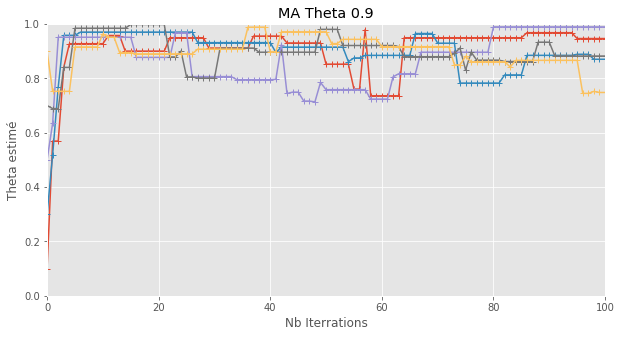

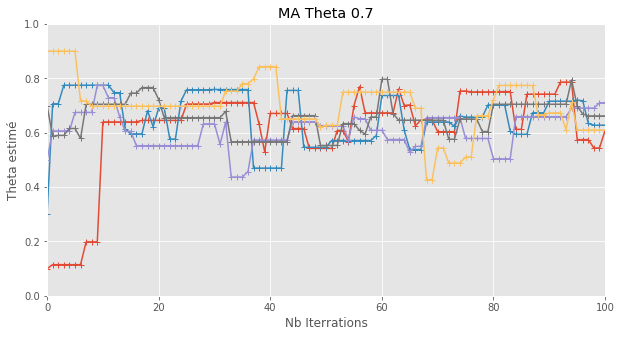

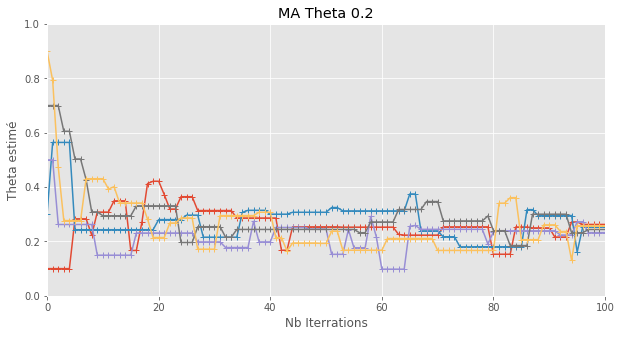

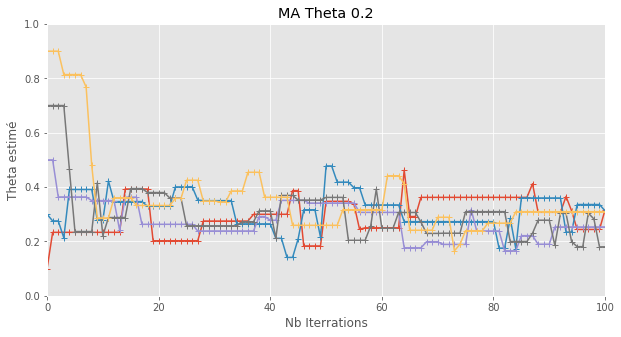

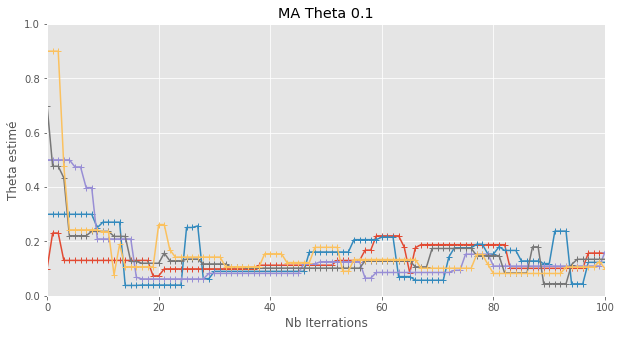

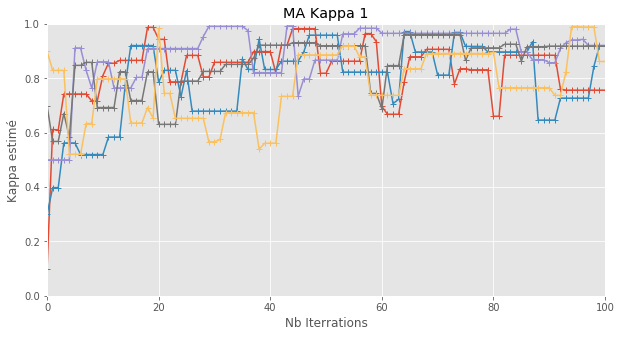

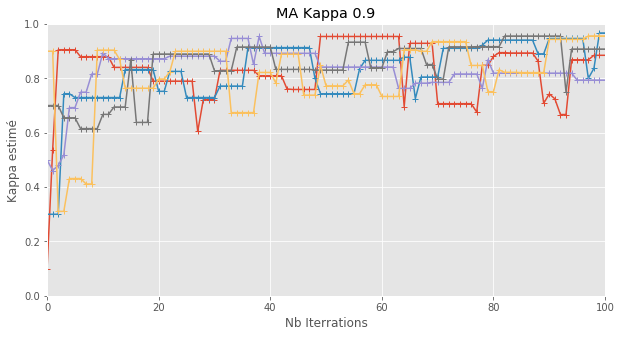

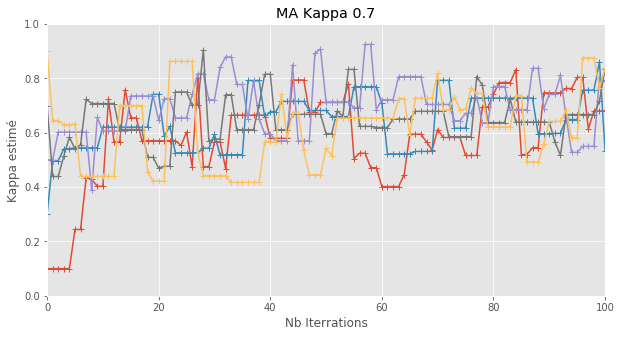

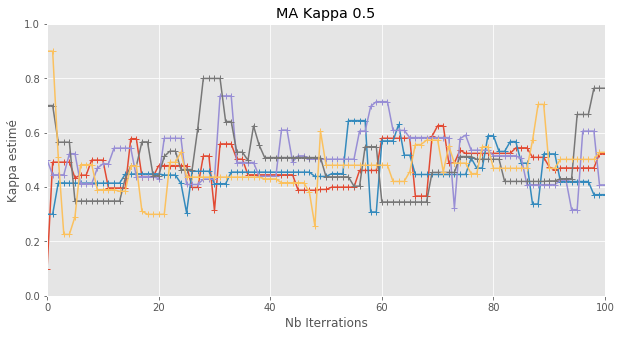

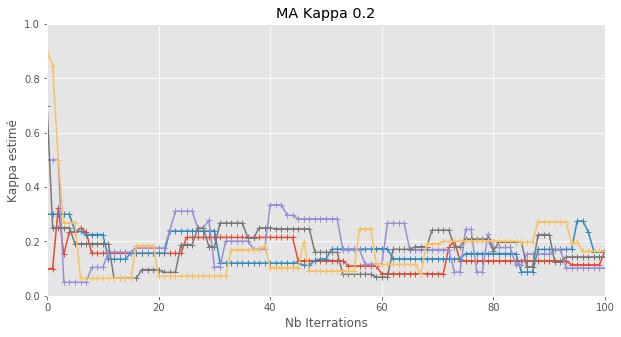

In [52]:
for i in range(part0[0].shape[0]) :
    plt.figure(figsize=(10, 5))
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    for samples in sampless_MA :
        
        #### MP
        plt.title('MA '+'Theta '+ str(thetas[i])) 
        thetas_MH_MA, kappas_MH_MA = split_sample(samples)
        plt.plot(np.array(thetas_MH_MA[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
        
    
for i in range(part0[1].shape[0]) :
    plt.figure(figsize=(10, 5))
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    for samples in sampless_MA :
        
        #### MP
        plt.title('MA '+'Kappa '+ str(kappas[i])) 
        thetas_MH_MA, kappas_MH_MA = split_sample(samples)
        plt.plot(np.array(kappas_MH_MA[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
        
        
        